In [1]:
%load_ext autoreload
%autoreload 2
from mutabledataset import GermanSimDataset
from agent import RationalAgent
from simulation import Simulation
from learner import LogisticLearner

import plot
import numpy as np
import pandas as pd
def print_table(df):
    young = plot.count_df(df, [{'age': 0, 'credit_h': 1}, {'age': 0, 'credit_h': 0}])
    young_n = young.sum()
    young = young / young.sum() * 100

    old = plot.count_df(df, [{'age': 1, 'credit_h': 1}, {'age': 1, 'credit_h': 0}])
    old_n = old.sum()
    old = old / old.sum() * 100
    tbl = pd.DataFrame(data=[young,old], index=['Young ('+str(young_n)+')', 'Old ('+str(old_n)+')'], columns=['Good Credit', 'Bad Credit'])
    return (tbl)
    #plot.plot_pie(sim.dataset_df, [{'age': 0, 'credit_h': 1},
    #                               {'age': 0, 'credit_h': 0}],
    #              ['Good', 'Bad'], 'Young')

    #plot.plot_pie(sim.dataset_df, [{'age': 1, 'credit_h': 1},
    #                               {'age': 1, 'credit_h': 0}],
    #              ['Good', 'Bad'], 'Old')

    #plot.plot_pie(sim.dataset_new_df, [{'age': 0, 'credit_h': 1},
    #                               {'age': 0, 'credit_h': 0}],
    #              ['Good', 'Bad'], 'Young')

    #plot.plot_pie(sim.dataset_new_df, [{'age': 1, 'credit_h': 1},
    #                               {'age': 1, 'credit_h': 0}],
    #              ['Good', 'Bad'], 'Old')



/home/dan/.local/share/virtualenvs/simulation-lLjf8lvH/lib/python3.5/importlib/_bootstrap.py:222: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)
/home/dan/.local/share/virtualenvs/simulation-lLjf8lvH/lib/python3.5/importlib/_bootstrap.py:222: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)
/home/dan/.local/share/virtualenvs/simulation-lLjf8lvH/lib/python3.5/importlib/_bootstrap.py:222: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)
/home/dan/.local/share/virtualenvs/simulation-lLjf8lvH/lib/python3.5/importlib/_bootstrap.py:222: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)
/home/dan/.local/share/virtualenvs/simulation-lLjf8lvH/lib/python3.5/importlib/_bootstrap.py:222: RuntimeWar

# Logistic Regression

In [2]:
g = GermanSimDataset(mutable_features=['savings'],
                     domains={'savings': 'auto'},
                     discrete=['savings'])
sim = Simulation(g,
                 RationalAgent,
                 LogisticLearner(),
                 lambda size: np.abs(np.random.normal(loc=1.0,size=size)))
 
sim.start_simulation(include_protected=True)


/home/dan/ETH/ba/simulation/mutabledataset.py:68: UserWarning: Use set of values present in dataset to infer domain for feature savings
  warnings.warn("Use set of values present in dataset to infer domain for feature " + ft)


Train:  (500, 58) , Test:  (500, 58)
Accuracy (h) pre 0.732
(1000, 58)
Accuracy (h) post 0.762
Accuracy (h*) post 0.744
y=1 731.0  <-  700.0


In [3]:
df,_ = sim.train.convert_to_dataframe(de_dummy_code=True)
print(np.array(df['age'] == 0).sum())

77


### Mutable Features

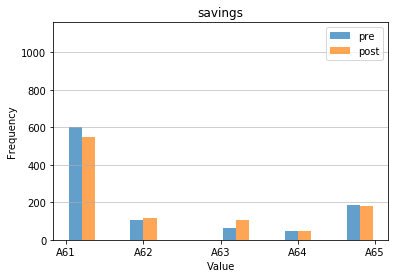

In [4]:
plot.plot_mutable_features(sim)

### Young, Old (Pre Simulation)

In [5]:
print_table(sim.dataset_df)

,Good Credit,Bad Credit
Young (149),59.060403,40.939597
Old (851),80.023502,19.976498


### Young, Old (Post Simulation)

In [6]:
print_table(sim.dataset_new_df)

,Good Credit,Bad Credit
Young (149),85.906040,14.093960
Old (851),82.608696,17.391304


# Logistic Regression with Reweighing

In [7]:
from learner import ReweighingLogisticLearner

g = GermanSimDataset(mutable_features=['status', 'savings'],
                     domains={'savings': 'auto', 'status': 'auto'},
                     discrete=['status', 'savings'],
                     protected_attribute_names=['age'],
                     privileged_classes=[lambda x: x >= 25],
                     features_to_drop=['personal_status', 'sex'])

privileged_groups = [{'age': 1}]
unprivileged_groups = [{'age': 0}]

sim = Simulation(g,
                 RationalAgent,
                 ReweighingLogisticLearner(privileged_groups,
                                           unprivileged_groups),
                 lambda size: np.abs(np.random.normal(loc=1.0,size=size)))
 
sim.start_simulation(include_protected=True)

/home/dan/ETH/ba/simulation/mutabledataset.py:68: UserWarning: Use set of values present in dataset to infer domain for feature savings
  warnings.warn("Use set of values present in dataset to infer domain for feature " + ft)
/home/dan/ETH/ba/simulation/mutabledataset.py:68: UserWarning: Use set of values present in dataset to infer domain for feature status
  warnings.warn("Use set of values present in dataset to infer domain for feature " + ft)


Train:  (500, 57) , Test:  (500, 57)
before reweighing (meandiff): -0.06226885955681172 after: -1.1102230246251565e-16
Accuracy (h) pre 0.762
(1000, 57)
Accuracy (h) post 0.784
before reweighing (meandiff): -0.11771249887248558 after: 1.1102230246251565e-16
Accuracy (h*) post 0.776
y=1 779.0  <-  700.0


### Young, Old (Pre Simulation)

In [8]:
print_table(sim.dataset_df)

,Good Credit,Bad Credit
Young (149),82.550336,17.449664
Old (851),77.320799,22.679201


### Young, Old (Post Simulation)

In [9]:
print_table(sim.dataset_new_df)

,Good Credit,Bad Credit
Young (149),89.932886,10.067114
Old (851),88.719154,11.280846


### Comments
Statistical parity difference improved.

In [10]:
df = sim.dataset_df
unique_elements, counts_elements = np.unique(df[df['age'] == 0]['status'], return_counts=True)
print(unique_elements, counts_elements/sum(counts_elements))

unique_elements, counts_elements = np.unique(df[df['age'] == 1]['status'], return_counts=True)
print(unique_elements, counts_elements/sum(counts_elements))

['A11' 'A12' 'A13' 'A14'] [0.38255034 0.30872483 0.05369128 0.25503356]
['A11' 'A12' 'A13' 'A14'] [0.25499412 0.26204465 0.06462985 0.41833137]


Above shows, that young people have less money in their bank account. Bank account balance is quite relevant for the output. Thus we can still infer age via bank account.

After playing around with the other fairness measures on the web application, I doubt that any of those will change this outcome for this particular dataset + protected attribute.

Other options: (basically do some actual affirmative action)
- play around with thresholds, see what happens
- different cost distribution, subsidize skill investement (feature manipulation)
- 
All the fairness measures in AIF360 are not affirmative action

In [11]:
from sklearn.linear_model import LogisticRegression

print(sim.dataset.label_names)
reg = LogisticRegression(solver='liblinear',max_iter=1000000000,C=1000000000000000000000.0).fit(sim.dataset.features, sim.dataset.labels.ravel())

df = pd.DataFrame(data=sim.dataset.features, columns=sim.dataset.feature_names)
data = plot._df_selection(df, {'age': 1})
print(list(reg.predict([data.values[0]])))

# next steps: implement modified decision function that enforces statistical parity...

['credit']
[1.0]


## Enforce Statistical Parity (threshold boost for unprivileged)

In [12]:
from learner import StatisticalParityLogisticLearner

g = GermanSimDataset(mutable_features=['status', 'savings'],
                     domains={'savings': 'auto', 'status': 'auto'},
                     discrete=['status', 'savings'],
                     protected_attribute_names=['age'],
                     privileged_classes=[lambda x: x >= 25],
                     features_to_drop=['personal_status', 'sex'])

privileged_groups = [{'age': 1}]
unprivileged_groups = [{'age': 0}]

sim = Simulation(g,
                 RationalAgent,
                 StatisticalParityLogisticLearner(privileged_groups,
                                           unprivileged_groups, 0.0000001),
                 lambda size: np.abs(np.random.normal(loc=1.0,size=size)))
 
sim.start_simulation(include_protected=True)

Train:  (500, 57) , Test:  (500, 57)
{'age': 1}
Boost: 0.15949422121047974


/home/dan/ETH/ba/simulation/mutabledataset.py:68: UserWarning: Use set of values present in dataset to infer domain for feature savings
  warnings.warn("Use set of values present in dataset to infer domain for feature " + ft)
/home/dan/ETH/ba/simulation/mutabledataset.py:68: UserWarning: Use set of values present in dataset to infer domain for feature status
  warnings.warn("Use set of values present in dataset to infer domain for feature " + ft)


Accuracy (h) pre 0.604
(1000, 57)
Accuracy (h) post 0.698
{'age': 1}
Boost: 0.14948266744613647
Accuracy (h*) post 0.694
y=1 765.0  <-  700.0


### Young, Old (Pre Simulation)

In [13]:
print_table(sim.dataset_df)

,Good Credit,Bad Credit
Young (149),79.865772,20.134228
Old (851),81.551116,18.448884


### Young, Old (Post Simulation)

In [14]:
print_table(sim.dataset_new_df)

,Good Credit,Bad Credit
Young (149),91.275168,8.724832
Old (851),90.599295,9.400705


# Adversial Debiasing

In [19]:
from learner import AdversialDebiasingLogisticLearner

g = GermanSimDataset(mutable_features=['status', 'savings'],
                     domains={'savings': 'auto', 'status': 'auto'},
                     discrete=['status', 'savings'],
                     protected_attribute_names=['age'],
                     privileged_classes=[lambda x: x >= 25],
                     features_to_drop=['personal_status', 'sex'])

privileged_groups = [{'age': 1}]
unprivileged_groups = [{'age': 0}]

sim = Simulation(g,
                 RationalAgent,
                 AdversialDebiasingLogisticLearner(privileged_groups = privileged_groups,
                          unprivileged_groups = unprivileged_groups),
                 lambda size: np.abs(np.random.normal(loc=0.5,size=size)))
 
sim.start_simulation(include_protected=True)

/home/dan/ETH/ba/simulation/mutabledataset.py:68: UserWarning: Use set of values present in dataset to infer domain for feature savings
  warnings.warn("Use set of values present in dataset to infer domain for feature " + ft)
/home/dan/ETH/ba/simulation/mutabledataset.py:68: UserWarning: Use set of values present in dataset to infer domain for feature status
  warnings.warn("Use set of values present in dataset to infer domain for feature " + ft)


Train:  (500, 57) , Test:  (500, 57)
epoch 0; iter: 0; batch classifier loss: 0.679220; batch adversarial loss: 0.749470
epoch 1; iter: 0; batch classifier loss: 0.628794; batch adversarial loss: 0.727408
epoch 2; iter: 0; batch classifier loss: 0.613536; batch adversarial loss: 0.732901
epoch 3; iter: 0; batch classifier loss: 0.603168; batch adversarial loss: 0.733453
epoch 4; iter: 0; batch classifier loss: 0.589309; batch adversarial loss: 0.731225
epoch 5; iter: 0; batch classifier loss: 0.524325; batch adversarial loss: 0.727602
epoch 6; iter: 0; batch classifier loss: 0.531629; batch adversarial loss: 0.730323
epoch 7; iter: 0; batch classifier loss: 0.506523; batch adversarial loss: 0.727918
epoch 8; iter: 0; batch classifier loss: 0.584862; batch adversarial loss: 0.734142
epoch 9; iter: 0; batch classifier loss: 0.518870; batch adversarial loss: 0.706247
epoch 10; iter: 0; batch classifier loss: 0.514486; batch adversarial loss: 0.718355
epoch 11; iter: 0; batch classifier lo

Accuracy (h*) post 0.804
y=1 798.0  <-  700.0


### Young, Old (Pre Simulation)

In [20]:
print_table(sim.dataset_df)

,Good Credit,Bad Credit
Young (149),43.624161,56.375839
Old (851),82.373678,17.626322


### Young, Old (Post Simulation)

In [21]:
print_table(sim.dataset_new_df)

,Good Credit,Bad Credit
Young (149),92.617450,7.382550
Old (851),90.834313,9.165687


# EqOdds Postprocessing

In [18]:
from learner import EqOddsPostprocessingLogisticLearner

g = GermanSimDataset(mutable_features=['status', 'savings'],
                     domains={'savings': 'auto', 'status': 'auto'},
                     discrete=['status', 'savings'],
                     protected_attribute_names=['age'],
                     privileged_classes=[lambda x: x >= 25],
                     features_to_drop=['personal_status', 'sex'])

privileged_groups = [{'age': 1}]
unprivileged_groups = [{'age': 0}]

sim = Simulation(g,
                 RationalAgent,
                 EqOddsPostprocessingLogisticLearner(privileged_groups = privileged_groups,
                          unprivileged_groups = unprivileged_groups),
                 lambda size: np.abs(np.random.normal(loc=0.5,size=size)))
 
sim.start_simulation(include_protected=True)

/home/dan/ETH/ba/simulation/mutabledataset.py:68: UserWarning: Use set of values present in dataset to infer domain for feature savings
  warnings.warn("Use set of values present in dataset to infer domain for feature " + ft)
/home/dan/ETH/ba/simulation/mutabledataset.py:68: UserWarning: Use set of values present in dataset to infer domain for feature status
  warnings.warn("Use set of values present in dataset to infer domain for feature " + ft)


Train:  (500, 57) , Test:  (500, 57)
Accuracy (h) pre 0.0
(1000, 57)
Accuracy (h) post 0.0
Accuracy (h*) post 0.0
y=1 700.0  <-  700.0


ValueError: Length of passed values is 500, index implies 1000

### Young, Old (Pre Simulation)

In [ ]:
print_table(sim.dataset_df)

### Young, Old (Post Simulation)

In [ ]:
print_table(sim.dataset_new_df)